<a href="https://colab.research.google.com/github/mryeazel-729/MLHealth/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Setup`

In [70]:
pip install ucimlrepo

In [71]:
pip install lifelines

# Step 1




In [72]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bone_marrow_transplant_children = fetch_ucirepo(id=565)

# data (as pandas dataframes)
X = bone_marrow_transplant_children.data.features
y = bone_marrow_transplant_children.data.targets

# metadata
print(bone_marrow_transplant_children.metadata)

# variable information
print(bone_marrow_transplant_children.variables)


{'uci_id': 565, 'name': 'Bone marrow transplant: children', 'repository_url': 'https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children', 'data_url': 'https://archive.ics.uci.edu/static/public/565/data.csv', 'abstract': 'The data set describes pediatric patients with several hematologic diseases, who were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 187, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Gender', 'Age'], 'target_col': ['survival_status'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5NP6Z', 'creators': ['Marek Sikora', 'Łukasz Wróbel', 'Adam Gudyś'], 'intro_paper': {'ID': 293, 'type': 'NATIVE', 'title': 'GuideR: a guided se

In [73]:
import pandas as pd
from scipy.io import arff

# Remove 'survival_time' from X values and add it to y
y = pd.concat([y, X['survival_time']], axis=1)
X = X.drop(columns=['survival_time'])

# Display the first few rows and information about the DataFrames X and y.
display(X.head())
display(X.info())
display(y.head())
display(y.info())

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,Relapse,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,0,0,1.0,7.20,1.338760,5.38,35.0,19,51,32
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1,1,1.0,4.50,11.078295,0.41,20.6,16,37,1000000
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1,1,1.0,7.94,19.013230,0.42,23.4,23,20,1000000
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,0,0,NaN,4.25,29.481647,0.14,50.0,23,29,19
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,0,1,1.0,51.85,3.972255,13.05,9.0,14,14,1000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    int64  
 1   Stemcellsource        187 non-null    int64  
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    int64  
 4   IIIV                  187 non-null    int64  
 5   Gendermatch           187 non-null    int64  
 6   DonorABO              187 non-null    int64  
 7   RecipientABO          186 non-null    float64
 8   RecipientRh           185 non-null    float64
 9   ABOmatch              186 non-null    float64
 10  CMVstatus             171 non-null    float64
 11  DonorCMV              185 non-null    float64
 12  RecipientCMV          173 non-null    float64
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    int64  
 15  Txpostrelapse         1

None

,survival_status,survival_time
0,0,999
1,1,163
2,1,435
3,1,53
4,0,2043


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   survival_status  187 non-null    int64
 1   survival_time    187 non-null    int64
dtypes: int64(2)
memory usage: 3.1 KB


None

## Percentage of Missing Values

In [74]:
X.isnull().sum() / len(X)

# Proportion of missing values (as percentage)
missing_percent = X.isnull().sum() / len(X) * 100

print(missing_percent)


Recipientgender          0.000000
Stemcellsource           0.000000
Donorage                 0.000000
Donorage35               0.000000
IIIV                     0.000000
Gendermatch              0.000000
DonorABO                 0.000000
RecipientABO             0.534759
RecipientRh              1.069519
ABOmatch                 0.534759
CMVstatus                8.556150
DonorCMV                 1.069519
RecipientCMV             7.486631
Disease                  0.000000
Riskgroup                0.000000
Txpostrelapse            0.000000
Diseasegroup             0.000000
HLAmatch                 0.000000
HLAmismatch              0.000000
Antigen                  0.534759
Allele                   0.534759
HLAgrI                   0.000000
Recipientage             0.000000
Recipientage10           0.000000
Recipientageint          0.000000
Relapse                  0.000000
aGvHDIIIIV               0.000000
extcGvHD                16.577540
CD34kgx10d6              0.000000
CD3dCD34      

## Correlation with Survival Time

In [75]:
# Drop the non-numeric 'Disease' column from X
X_numeric = X.drop('Disease', axis=1)

# Calculate the correlation of features in X_numeric with 'survival_time' from y
survival_corr = X_numeric.corrwith(y['survival_time']).sort_values()

print(survival_corr)

PLTrecovery            -0.325751
ANCrecovery            -0.180974
Relapse                -0.164813
Rbodymass              -0.145298
Recipientage           -0.137583
RecipientRh            -0.126351
Gendermatch            -0.110597
Recipientage10         -0.075985
Recipientageint        -0.070310
IIIV                   -0.064272
RecipientABO           -0.062070
Recipientgender        -0.060487
Riskgroup              -0.048790
Donorage35             -0.041369
Stemcellsource         -0.041253
Txpostrelapse           0.001266
Donorage                0.005603
DonorCMV                0.007029
Diseasegroup            0.009649
DonorABO                0.016415
ABOmatch                0.022018
Allele                  0.037602
HLAgrI                  0.037884
CD3dCD34                0.044016
Antigen                 0.054060
HLAmatch                0.054196
CD3dkgx10d8             0.060991
CMVstatus               0.066698
HLAmismatch             0.078839
RecipientCMV            0.086392
extcGvHD  

## Feature Correlation

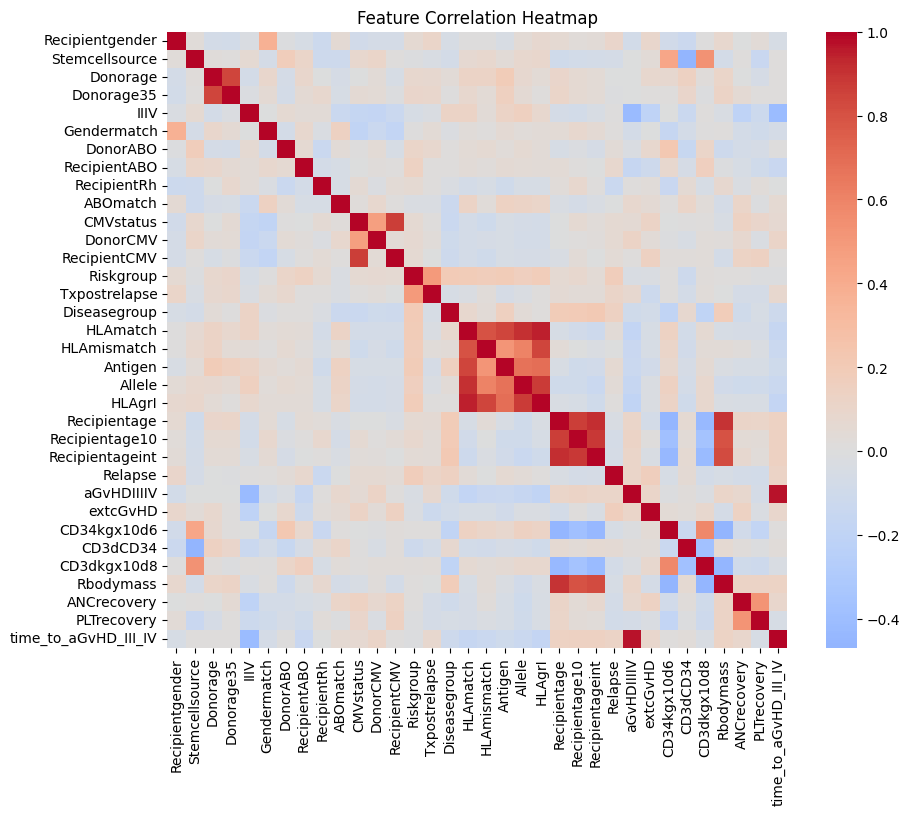

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(X.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [77]:
corr_matrix = X.corr(numeric_only=True)

# Convert correlation matrix into long format
corr_pairs = corr_matrix.unstack()

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Keep only high correlations
high_corr = corr_pairs[abs(corr_pairs) > 0.75].sort_values(ascending=False)
high_corr = high_corr.drop_duplicates()

print(high_corr)

aGvHDIIIIV       time_to_aGvHD_III_IV    0.969243
HLAgrI           HLAmatch                0.947155
Recipientageint  Recipientage            0.917351
HLAmatch         Allele                  0.903524
Recipientage     Rbodymass               0.897538
Recipientageint  Recipientage10          0.888610
Allele           HLAgrI                  0.875855
RecipientCMV     CMVstatus               0.873110
Recipientage     Recipientage10          0.872302
Antigen          HLAmatch                0.847534
HLAmismatch      HLAgrI                  0.846460
Donorage35       Donorage                0.840927
Rbodymass        Recipientageint         0.820612
HLAmismatch      HLAmatch                0.797979
Recipientage10   Rbodymass               0.794661
dtype: float64


## Correlation Filtering

In [78]:
survival_thresh = 0.1

high_survival = survival_corr[abs(survival_corr) > survival_thresh]

print(high_survival)

PLTrecovery            -0.325751
ANCrecovery            -0.180974
Relapse                -0.164813
Rbodymass              -0.145298
Recipientage           -0.137583
RecipientRh            -0.126351
Gendermatch            -0.110597
extcGvHD                0.131143
time_to_aGvHD_III_IV    0.131168
CD34kgx10d6             0.139313
aGvHDIIIIV              0.144717
dtype: float64


In [79]:
keep_survival = set(high_survival.index)

# Features correlated with other features
keep_pairs = set([i for i,j in high_corr.index] + [j for i,j in high_corr.index])

# Union of both sets
final_keep = keep_survival.union(keep_pairs)

# Filter dataset
X_filtered = X[list(final_keep)]
print("Final selected features:", X_filtered.columns.tolist())
count = len(X_filtered.columns)
print("Number of selected features:", count)

Final selected features: ['Relapse', 'Gendermatch', 'HLAmismatch', 'Donorage35', 'Antigen', 'extcGvHD', 'Recipientage', 'RecipientCMV', 'RecipientRh', 'CMVstatus', 'Rbodymass', 'Recipientageint', 'HLAgrI', 'Recipientage10', 'CD34kgx10d6', 'ANCrecovery', 'HLAmatch', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'aGvHDIIIIV', 'Donorage', 'Allele']
Number of selected features: 22


# Step 2

## Silouette Scores

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Drop the non-numeric 'Disease' column before scaling
X_numeric = X.drop('Disease', axis=1)

# Imput missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Evaluate clustering for different numbers of clusters using Silhouette Score
for k in range(2, 10):
    labels = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette={score}")

Silhouette scores for different numbers of clusters:
k=2, silhouette=0.10276079316086999
k=3, silhouette=0.10751212947081139
k=4, silhouette=0.11725403564695232
k=5, silhouette=0.109371752585586
k=6, silhouette=0.08107331792514591
k=7, silhouette=0.07839319848194647
k=8, silhouette=0.0803703072872318
k=9, silhouette=0.06886320853812503


## K-means Clusters

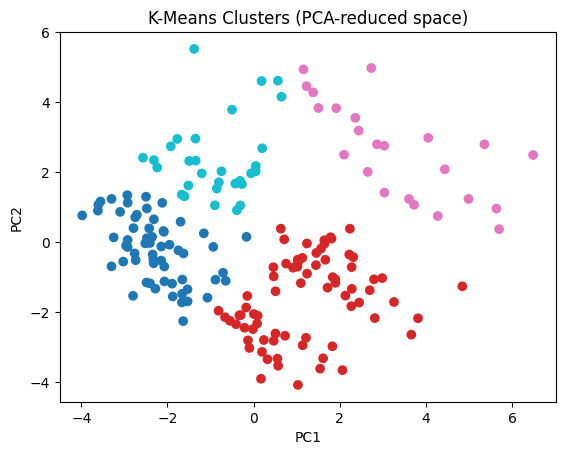

Cluster counts:
 0    61
1    73
2    23
3    30
Name: count, dtype: int64


In [89]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_kmeans, cmap='tab10')
plt.title("K-Means Clusters (PCA-reduced space)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

from sklearn.cluster import KMeans

# Using optimal number of clusters from above
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_pca)

print("Cluster counts:\n", pd.Series(clusters_kmeans).value_counts().sort_index())

# Step 3

## Kaplan-Meier

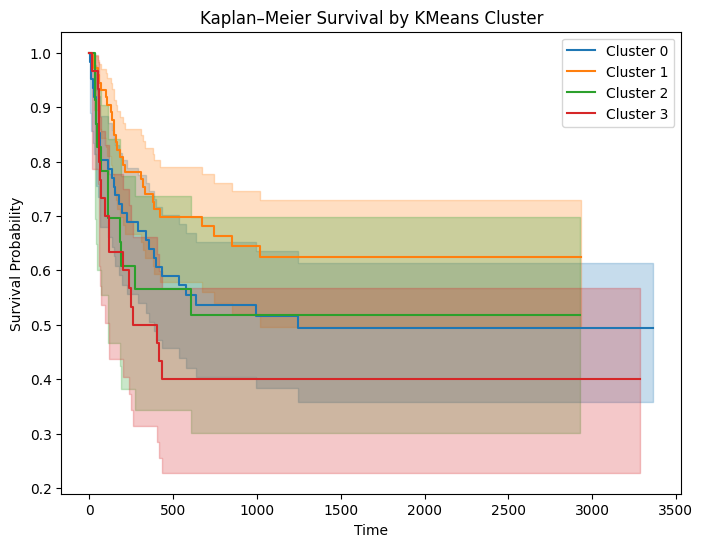

In [83]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import pandas as pd

kmf = KaplanMeierFitter()

plt.figure(figsize=(8,6))

# Create a DataFrame containing the survival data and cluster assignments
data = pd.DataFrame({
    "survival_time": y["survival_time"],
    "event": y["survival_status"], # Rename the column to 'event'
    "clusters_kmeans": clusters_kmeans
})


for cluster in sorted(data["clusters_kmeans"].unique()):
    ix = data["clusters_kmeans"] == cluster
    kmf.fit(data.loc[ix, "survival_time"],
            event_observed=data.loc[ix, "event"],
            label=f"Cluster {cluster}")
    kmf.plot_survival_function()

plt.title("Kaplan–Meier Survival by KMeans Cluster")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

## Cox Regression

<lifelines.CoxPHFitter: fitted with 187 total observations, 102 right-censored observations>
             duration col = 'survival_time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 187
number of events observed = 85
   partial log-likelihood = -416.54
         time fit was run = 2025-10-03 10:18:57 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
clusters_kmeans_1 -0.43      0.65      0.27           -0.96            0.09                0.38                1.10
clusters_kmeans_2  0.02      1.02      0.35           -0.67            0.71                0.51                2.04
clusters_kmeans_3  0.32      1.38      0.30           -0.27            0.90                0.77                2.47

                   cmp to     z    p  -log2(p)
covariate                                     
clusters_kmeans_1    0.00 -1.62 0.11      3.24
clusters_kmeans_2    0.00  0.06 0.95      0.08
clusters_kmeans_3    0.00  1.07 0.28      1.81
---
Concordance = 0.58
Partial AIC = 839.07
log-likelihood ratio test = 6.43 on 3 df
-log2(p) of ll-ratio test = 3.44

<Axes: xlabel='log(HR) (95% CI)'>

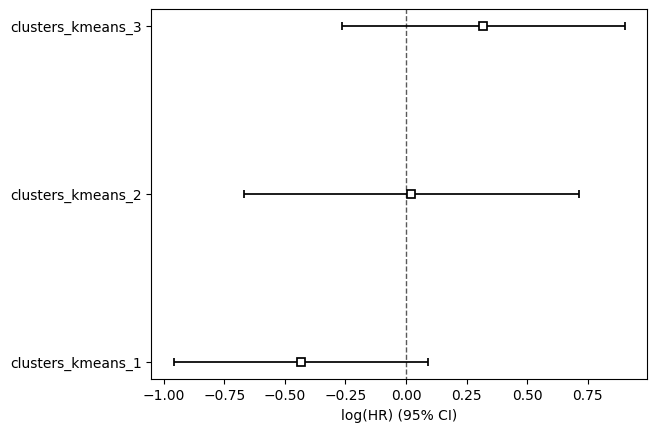

In [88]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

# Create a DataFrame containing the survival data and cluster assignments
cox_data = pd.DataFrame({
    "survival_time": y["survival_time"],
    "event": y["survival_status"],
    "clusters_kmeans": clusters_kmeans
})

# Use cluster as a categorical variable
cox_data = pd.get_dummies(cox_data, columns=["clusters_kmeans"], drop_first=True)

cph.fit(cox_data, duration_col="survival_time", event_col="event")
cph.print_summary()
cph.plot()